### **Manejo de Valores Perdidos y Outliers**

In [24]:
# ==========================================
# 1. Carga y exploración del dataset
# ==========================================

# Simulamos un dataset con valores perdidos y outliers
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Edad': [25, 32, 45, None, 28, 60, 22, 19, None, 150],  # 150 es outlier
    'Salario': [50000, 54000, None, 62000, 58000, None, 52000, 48000, 75000, 200000],  # 200000 es outlier
    'Departamento': ['Ventas', 'TI', 'TI', 'RH', None, 'Ventas', 'Marketing', None, 'TI', 'Ventas'],
    'Experiencia': [3, 5, None, 2, 4, 10, 1, None, 8, 15]  # 15 es outlier
}

df = pd.DataFrame(data)
print("\n=== Dataset original ===")
print(df.head())

# Información general del dataset
print("\n=== Información del dataset ===")
print(df.info())

# Valores nulos por columna
print("\n=== Valores nulos por columna ===")
print(df.isnull().sum())


=== Dataset original ===
   ID  Edad  Salario Departamento  Experiencia
0   1  25.0  50000.0       Ventas          3.0
1   2  32.0  54000.0           TI          5.0
2   3  45.0      NaN           TI          NaN
3   4   NaN  62000.0           RH          2.0
4   5  28.0  58000.0         None          4.0

=== Información del dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            10 non-null     int64  
 1   Edad          8 non-null      float64
 2   Salario       8 non-null      float64
 3   Departamento  8 non-null      object 
 4   Experiencia   8 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 532.0+ bytes
None

=== Valores nulos por columna ===
ID              0
Edad            2
Salario         2
Departamento    2
Experiencia     2
dtype: int64


In [25]:
# ==========================================
# 2. Manejo de valores perdidos
# ==========================================

# a) Imputación de valores numéricos (sin warning)
df['Edad'] = df['Edad'].fillna(df['Edad'].median())  # Mediana por robustez
df['Salario'] = df['Salario'].fillna(df['Salario'].mean())  # Media para salarios
df['Experiencia'] = df['Experiencia'].fillna(df['Experiencia'].median())

# b) Imputación de valores categóricos (sin warning)
df['Departamento'] = df['Departamento'].fillna(df['Departamento'].mode()[0])

# c) Opción alternativa: Eliminar filas con más del 50% de valores nulos
# df = df.dropna(thresh=df.shape[1]*0.5)

print("\n=== Dataset después de imputación ===")
print(df.isnull().sum())


=== Dataset después de imputación ===
ID              0
Edad            0
Salario         0
Departamento    0
Experiencia     0
dtype: int64


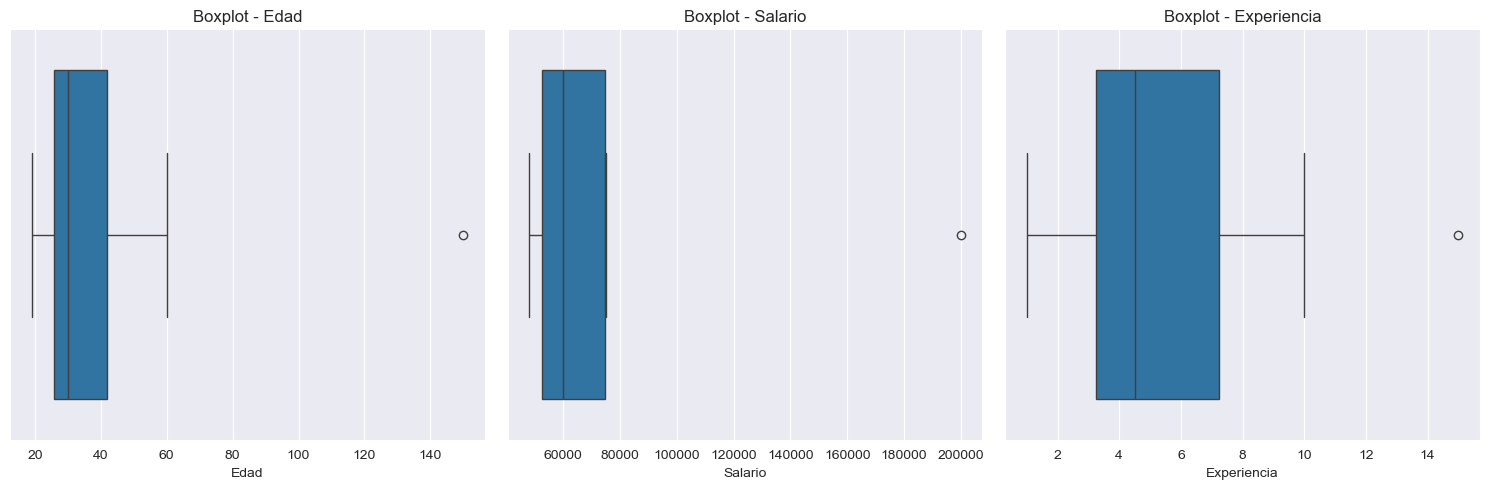


Outliers en Edad:
   ID   Edad
9  10  150.0

Outliers en Salario:
   ID   Salario
9  10  200000.0

Outliers en Experiencia:
   ID  Experiencia
9  10         15.0


In [26]:
# ==========================================
# 3. Detección y tratamiento de outliers
# ==========================================

def detectar_outliers(df, columna):
    """Detecta outliers usando el método IQR"""
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return outliers, limite_inferior, limite_superior

# a) Visualización de outliers
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Edad'])
plt.title('Boxplot - Edad')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['Salario'])
plt.title('Boxplot - Salario')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['Experiencia'])
plt.title('Boxplot - Experiencia')
plt.tight_layout()
plt.show()

# b) Detección y tratamiento para Edad
outliers_edad, li_edad, ls_edad = detectar_outliers(df, 'Edad')
print(f"\nOutliers en Edad:\n{outliers_edad[['ID', 'Edad']]}")

# Estrategia: Winsorization (ajuste a los límites)
df['Edad'] = df['Edad'].clip(lower=li_edad, upper=ls_edad)

# c) Detección y tratamiento para Salario
outliers_salario, li_salario, ls_salario = detectar_outliers(df, 'Salario')
print(f"\nOutliers en Salario:\n{outliers_salario[['ID', 'Salario']]}")

# Estrategia: Transformación logarítmica
df['Salario_log'] = np.log(df['Salario'])

# d) Detección y tratamiento para Experiencia
outliers_exp, li_exp, ls_exp = detectar_outliers(df, 'Experiencia')
print(f"\nOutliers en Experiencia:\n{outliers_exp[['ID', 'Experiencia']]}")

# Estrategia: Eliminación de registros
df = df[~df['ID'].isin(outliers_exp['ID'])]


=== Resumen post-limpieza ===
Valores nulos restantes:
ID              0
Edad            0
Salario         0
Departamento    0
Experiencia     0
Salario_log     0
dtype: int64

Estadísticas descriptivas:
             ID       Edad       Salario  Experiencia  Salario_log
count  9.000000   9.000000      9.000000     9.000000     9.000000
mean   5.000000  32.333333  60972.222222     4.666667    11.003328
std    2.738613  12.718097  11241.798708     2.817357     0.181906
min    1.000000  19.000000  48000.000000     1.000000    10.778956
25%    3.000000  25.000000  52000.000000     3.000000    10.858999
50%    5.000000  30.000000  58000.000000     4.500000    10.968198
75%    7.000000  32.000000  74875.000000     5.000000    11.223575
max    9.000000  60.000000  75000.000000    10.000000    11.225243


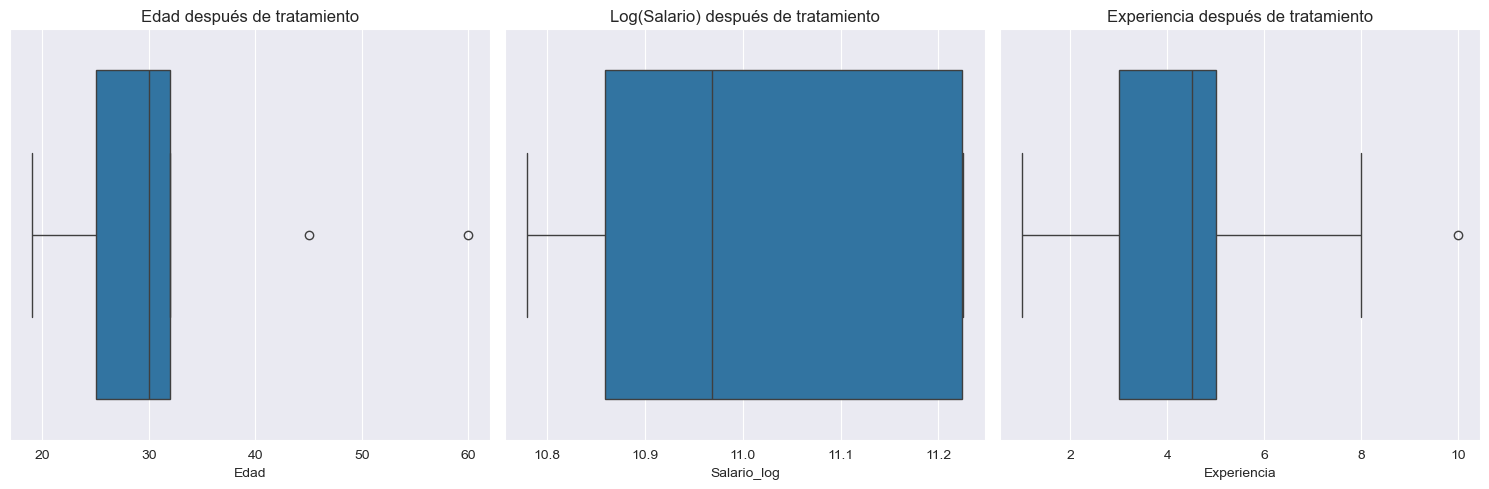

In [27]:
# ==========================================
# 4. Validación de datos limpios
# ==========================================

print("\n=== Resumen post-limpieza ===")
print("Valores nulos restantes:")
print(df.isnull().sum())

print("\nEstadísticas descriptivas:")
print(df.describe())

# Visualización post-limpieza
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Edad'])
plt.title('Edad después de tratamiento')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['Salario_log'])
plt.title('Log(Salario) después de tratamiento')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['Experiencia'])
plt.title('Experiencia después de tratamiento')
plt.tight_layout()
plt.show()

In [28]:
# ==========================================
# 5. Exportación de datos
# ==========================================

df.to_csv('datos_limpios_l4.csv', index=False)
print("\n=== Dataset limpio exportado a 'datos_limpios_l4.csv' ===")


=== Dataset limpio exportado a 'datos_limpios_l4.csv' ===


## **Explicación Detallada:**

### **1. Carga y Exploración**
Creamos un dataset simulado con:
* Valores nulos en columnas numéricas y categóricas
* Outliers evidentes (ej: edad=150, salario=200000)

* Usamos info() y isnull().sum() para analizar la estructura y valores faltantes

### **2. Manejo de Valores Perdidos**
Numéricos:
* Edad y Experiencia: Imputación con mediana (robusta a outliers)
* Salario: Imputación con media (distribución más estable)

Categóricos:
* Departamento: Imputación con moda (valor más frecuente)

### **3. Tratamiento de Outliers**
Detección: Método IQR (Rango Intercuartílico)
* Calculamos límites: [Q1 - 1.5*IQR, Q3 + 1.5*IQR]

Estrategias:
* Edad: Winsorization (ajustar valores a los límites)
* Salario: Transformación logarítmica (para reducir el impacto de valores extremos)
* Experiencia: Eliminación (por ser un caso extremo)

### **Validación**
Verificamos que no queden valores nulos
Generamos estadísticas descriptivas y nuevos boxplots para validar la limpieza

### **Exportación**
Guardamos el dataset limpio en CSV para análisis posteriores